In [1]:
# Import necessary libraries
import yfinance as yf 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# Define a function for plotting graphs
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of stock")

In [3]:
# Fetch stock data for the past 20 years
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)
stock = "MSFT"
stock_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Display basic data information
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-07-12,27.670000,28.000000,27.590000,27.889999,17.380148,45757300
2004-07-13,27.910000,27.950001,27.600000,27.600000,17.199438,43274100
2004-07-14,27.400000,28.360001,27.340000,28.129999,17.529713,87656300
2004-07-15,28.049999,28.200001,27.799999,27.870001,17.367695,46759700
2004-07-16,28.180000,28.200001,27.250000,27.480000,17.124666,66406300


In [5]:
stock_data.shape

(5034, 6)

In [6]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,98.745052,99.701432,97.766877,98.782090,92.687626,4.540588e+07
std,107.263288,108.275231,106.205527,107.313759,108.338462,2.850638e+07
min,15.200000,15.620000,14.870000,15.150000,11.263443,7.425600e+06
25%,27.650000,27.900000,27.370001,27.642499,20.492191,2.571142e+07
50%,41.434999,41.775000,41.065001,41.519999,35.565435,3.810570e+07
75%,135.890003,136.612495,133.774998,135.642498,129.581779,5.753525e+07
max,467.000000,468.350006,464.459991,467.559998,467.559998,5.910522e+08


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-07-12 to 2024-07-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [8]:
stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Closing price of stock')

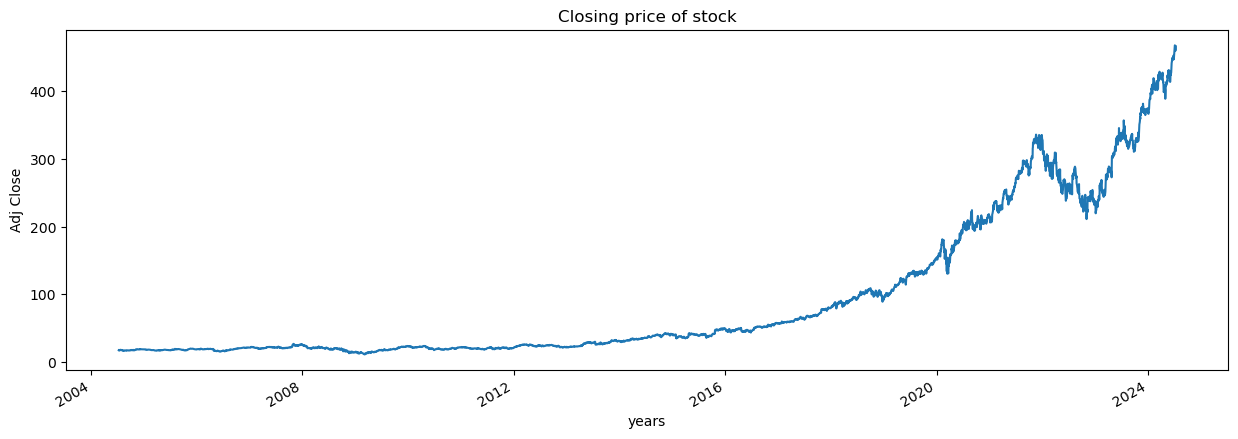

In [9]:
# Plot the adjusted closing price
plt.figure(figsize = (15,5))
stock_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of stock")

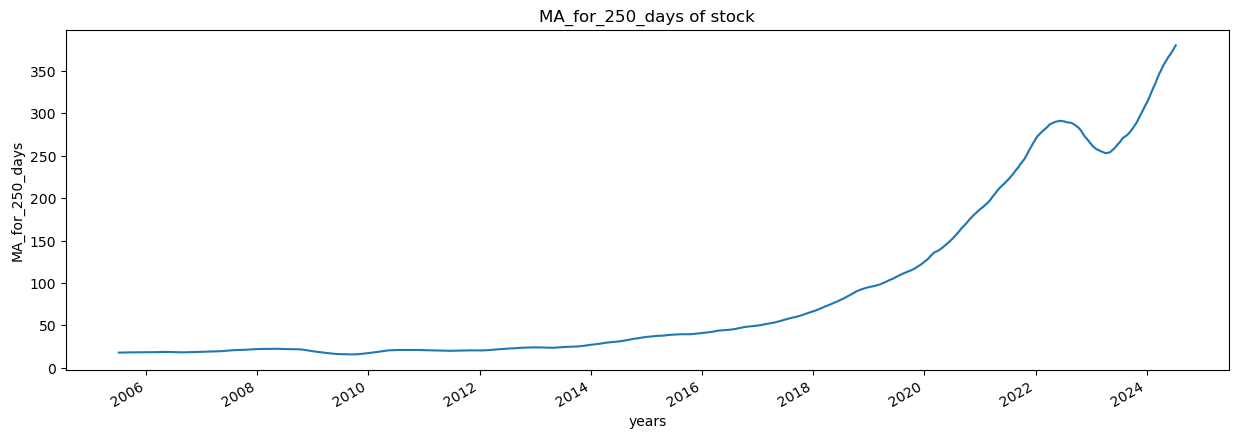

In [10]:
# Calculate and plot moving averages
stock_data['MA_for_250_days'] = stock_data['Adj Close'].rolling(250).mean()
plot_graph((15,5), stock_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

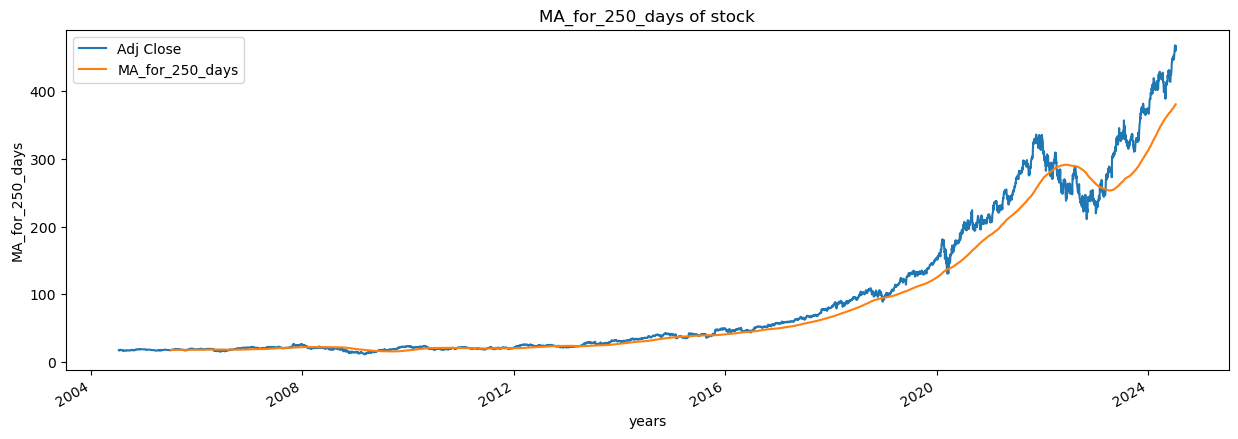

In [11]:
plot_graph((15,5), stock_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

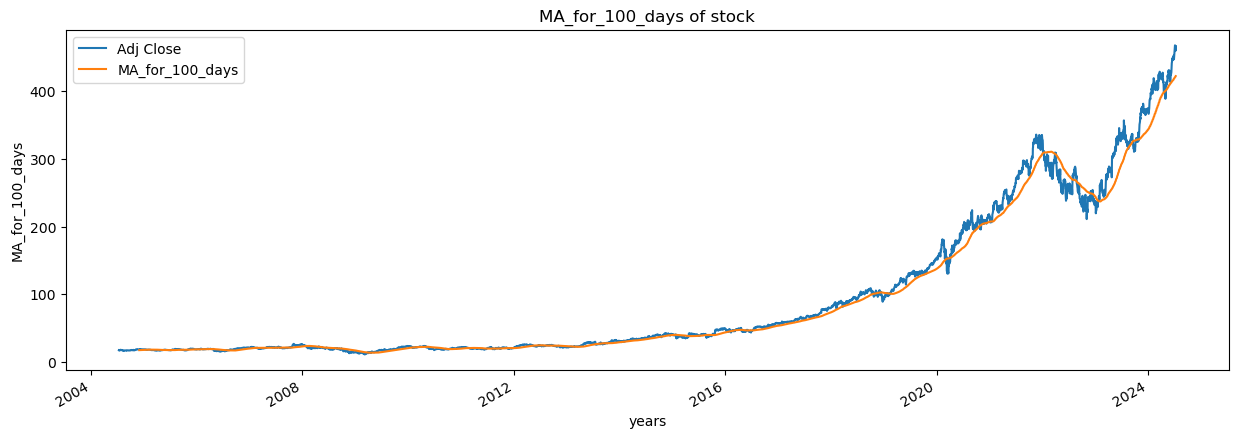

In [12]:
stock_data['MA_for_100_days'] = stock_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), stock_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

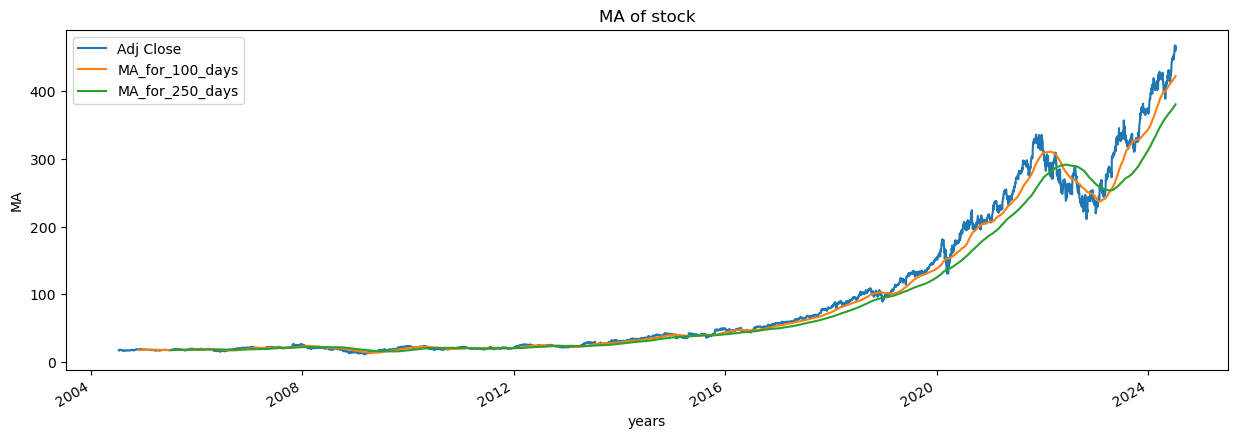

In [13]:
plot_graph((15,5), stock_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [14]:
# Calculate percentage change and plot it
stock_data['percentage_change_cp'] = stock_data['Adj Close'].pct_change()
stock_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-07-12,17.380148,NaN
2004-07-13,17.199438,-0.010397
2004-07-14,17.529713,0.019203
2004-07-15,17.367695,-0.009242
2004-07-16,17.124666,-0.013993


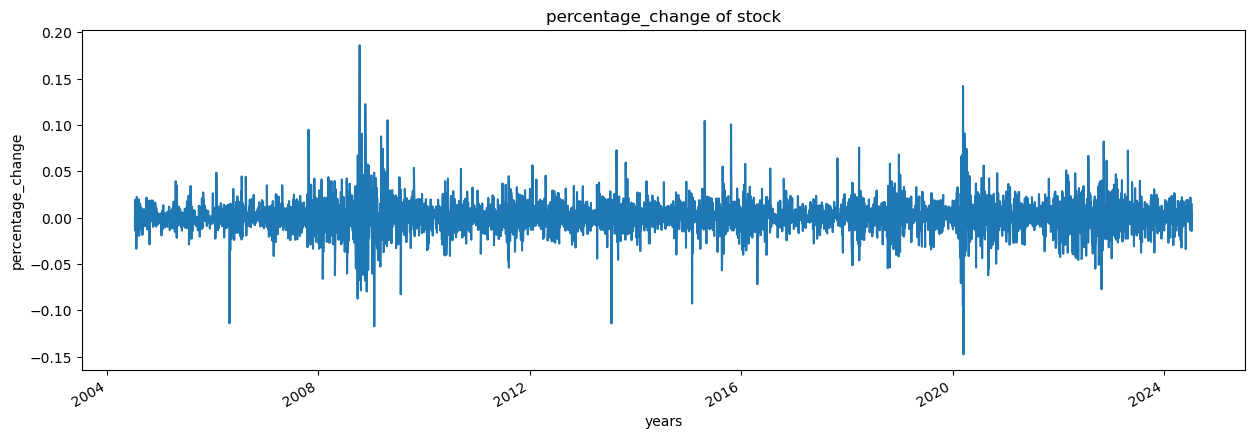

In [15]:
plot_graph((15,5), stock_data['percentage_change_cp'], 'percentage_change')

In [16]:
# Normalize the adjusted close price
Adj_close_price = stock_data[['Adj Close']]

In [17]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([467.55999756]), array([11.26344299]))

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.01340511],
       [0.01300907],
       [0.01373289],
       ...,
       [0.99710713],
       [0.98242374],
       [0.99712907]])

In [19]:
len(scaled_data)

5034

In [20]:
# Prepare the data for LSTM
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [21]:
x_data[0], y_data[0]

(array([[0.01340511],
        [0.01300907],
        [0.01373289],
        [0.01337782],
        [0.01284521],
        [0.01348707],
        [0.01399238],
        [0.01472985],
        [0.01492105],
        [0.01359632],
        [0.01445672],
        [0.01415626],
        [0.01434748],
        [0.01421088],
        [0.01422456],
        [0.01426552],
        [0.01365096],
        [0.01363731],
        [0.01291347],
        [0.01238083],
        [0.01243546],
        [0.01317295],
        [0.01274958],
        [0.01202576],
        [0.01221695],
        [0.01231255],
        [0.01225791],
        [0.01281786],
        [0.01235353],
        [0.01246279],
        [0.01262714],
        [0.01262714],
        [0.01305176],
        [0.01290109],
        [0.01292851],
        [0.01270935],
        [0.01270935],
        [0.01283262],
        [0.01314765],
        [0.01244908],
        [0.01279153],
        [0.01265454],
        [0.01268195],
        [0.01296959],
        [0.01264085],
        [0

In [22]:
splitting_len = int(len(x_data) * 0.7)
x_train, y_train = x_data[:splitting_len], y_data[:splitting_len]
x_test, y_test = x_data[splitting_len:], y_data[splitting_len:]

In [23]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (3453, 100, 1)
y_train shape: (3453, 1)
x_test shape: (1481, 100, 1)
y_test shape: (1481, 1)


In [24]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 [==============================] - 147s 42ms/step - loss: 5.5630e-05
Epoch 2/2
3453/3453 [==============================] - 149s 43ms/step - loss: 2.7532e-05


In [27]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Make predictions
predictions = model.predict(x_test)

47/47 [==============================] - 2s 30ms/step


In [29]:
predictions

array([[0.20043738],
       [0.19976997],
       [0.19868031],
       ...,
       [0.9639583 ],
       [0.96823275],
       [0.9663061 ]], dtype=float32)

In [30]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[102.72233 ],
       [102.41779 ],
       [101.920586],
       ...,
       [451.11432 ],
       [453.06473 ],
       [452.18558 ]], dtype=float32)

In [31]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[100.67880249],
       [ 99.84037018],
       [100.85779572],
       ...,
       [466.23999023],
       [459.54000854],
       [466.25      ]])

In [32]:
# Calculate RMSE
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test) ** 2))
print(f"RMSE: {rmse}")

RMSE: 6.660443260733037


In [33]:
# Prepare plotting data
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = stock_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-08-20,100.678802,102.722328
2018-08-21,99.840370,102.417793
2018-08-22,100.857796,101.920586
2018-08-23,101.328835,101.861153
2018-08-24,102.120178,102.080162


<Figure size 640x480 with 0 Axes>

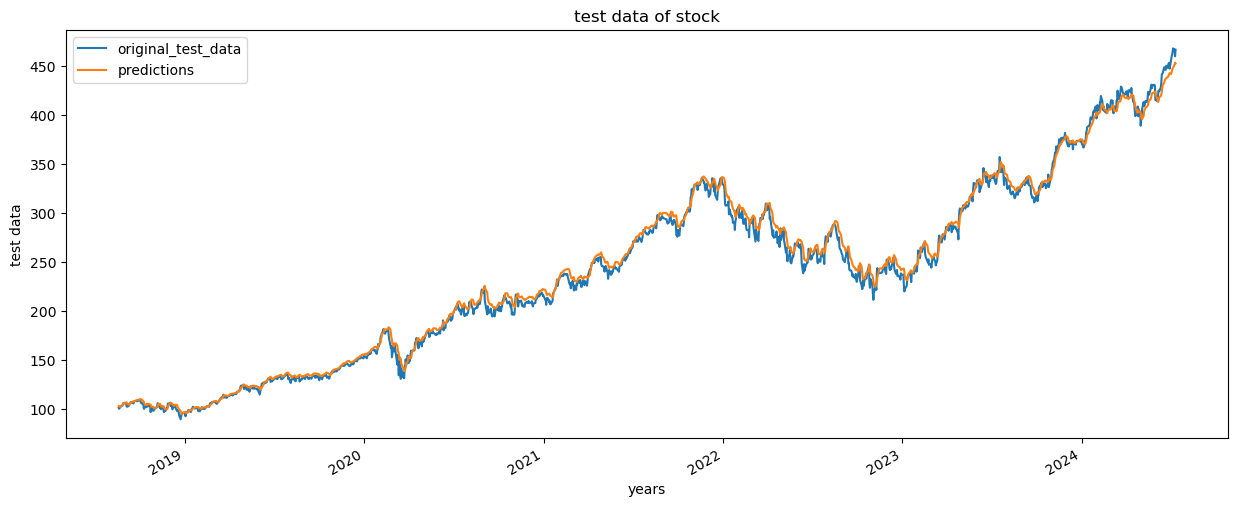

In [34]:
# Plot the results
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

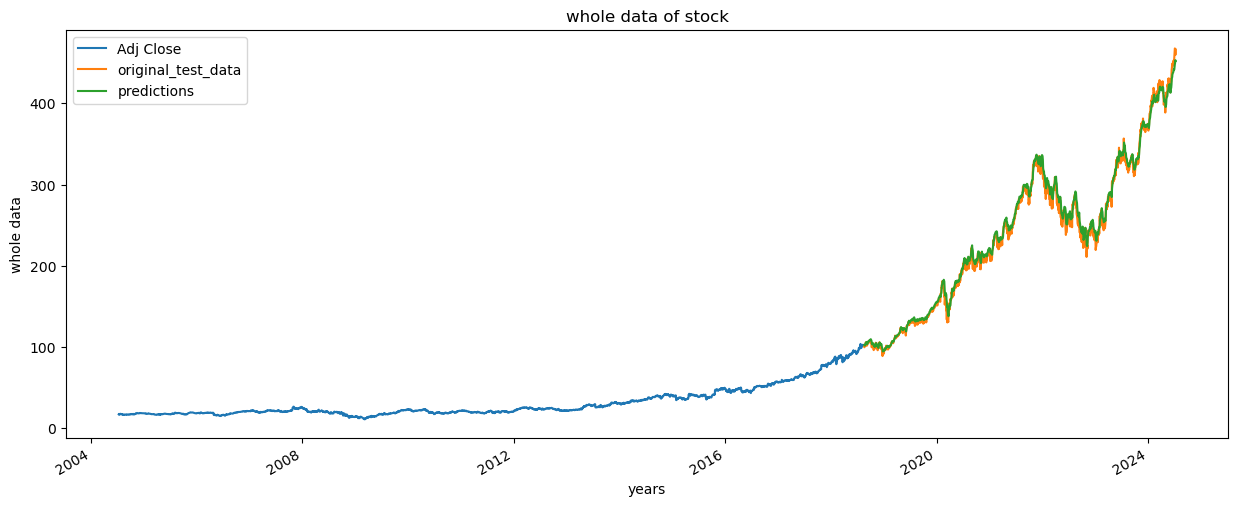

In [35]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [36]:
# Save the model
model.save("stock_price_prediction_model.keras")